In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
from option import VanillaOption, call_payoff, put_payoff

In [11]:
def american_binomial_prob4(option, spot, rate, vol, div, steps):
    strike = option.strike
    expiry = option.expiry
    call_t = 0.0
    spot_t = 0.0
    h = expiry / steps
    num_nodes = steps + 1
    #u = np.exp((rate - div) * h + vol * np.sqrt(h))
    #d = np.exp((rate - div) * h - vol * np.sqrt(h))
    u = 1.3
    d = 0.8
    pstar = (np.exp(rate * h) - d) / ( u - d)
    disc = np.exp(-rate * h) 
    spot_t = np.zeros((num_nodes, num_nodes))
    prc_t = np.zeros((num_nodes, num_nodes))
    del_t = np.zeros((num_nodes, num_nodes))
    bond_t = np.zeros((num_nodes, num_nodes))
    
    for j in range(num_nodes):
        spot_t[j,-1] = spot * (u ** (steps - j)) * (d ** (j))
        prc_t[j, -1] = option.payoff(spot_t[j, -1])

    for i in range((steps - 1), -1, -1):
        for j in range(i+1):
            spot_t[j,i] = spot_t[j,i+1] / u
            del_t[j,i] = (prc_t[j,i+1] - prc_t[j+1, i+1]) / (spot_t[j,i] * (u - d))
            bond_t[j,i] = disc * (u * prc_t[j+1,i+1] - d * prc_t[j,i+1])/ (u - d)
            prc_t[j,i] = del_t[j,i] * spot_t[j,i] + bond_t[j,i]
    
    #print(prc_t,del_t,bond_t,spot_t)      
    return (prc_t[0,0], del_t[0,0])

In [12]:
spot = 104.0
strike = 95.0
rate = 0.08
expiry = 1.0
vol = 0.3
div = 0.0
u = 1.3
d = 0.8
steps = 3

In [19]:
spots = [80.0, 90.0, 110.0, 120.0, 130.0,140,150,160,170,200,250]
prc=np.zeros(len(spots))
delta=np.zeros(len(spots))

for spot in spots:
    the_call = VanillaOption(strike, expiry, call_payoff)
    prc[spots.index(spot)], delta[spots.index(spot)] = american_binomial_prob4(the_call, spot, rate, vol, div, steps)
    #print(f"({spot:0.2f}, {prc:0.2f}, {delta:0.2f})")
    
print(prc,'\n',delta,'\n',spots)

[ 11.08055585  17.19321255  29.41852594  37.34516043  46.57605995
  55.80695946  65.03785898  74.26875849  83.499658   112.30394709
 162.30394709] 
 [0.48495817 0.60899351 0.78940853 0.84194335 0.87636019 0.90586035
 0.93142715 0.9537981  0.97353717 1.         1.        ] 
 [80.0, 90.0, 110.0, 120.0, 130.0, 140, 150, 160, 170, 200, 250]


In [21]:
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x=np.arange(1,7)
mu=(1/6)*x.sum()
x

array([1, 2, 3, 4, 5, 6])

In [26]:
mu
#the expected value (if it is even probability is 3.5 of a die)

3.5

In [30]:
np.random.randint(1,7)

6

In [31]:
np.random.randint(1,7,size=100)

array([6, 5, 6, 4, 3, 1, 4, 3, 5, 4, 3, 5, 4, 5, 1, 1, 2, 6, 1, 5, 1, 6,
       2, 6, 6, 3, 6, 5, 4, 4, 4, 2, 1, 4, 4, 5, 6, 2, 2, 6, 1, 1, 2, 2,
       1, 3, 5, 1, 6, 1, 6, 5, 4, 6, 5, 5, 3, 5, 6, 5, 2, 5, 5, 4, 3, 2,
       5, 5, 6, 3, 6, 6, 6, 1, 2, 4, 5, 2, 4, 6, 1, 6, 6, 2, 5, 3, 4, 5,
       1, 1, 5, 3, 3, 6, 2, 3, 5, 6, 1, 4])

Text(0, 0.5, 'Estimated mean')

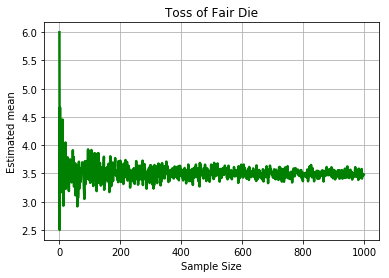

In [38]:
m = 1000
sizes=np.arange(1,m+1)
means=np.zeros((m,))

for i in range(len(sizes)):
    y=np.random.randint(1,7,size=sizes[i])
    means[i]=y.mean()

plt.plot(means,'g',lw=2.5)
plt.grid(True)
plt.title("Toss of Fair Die")
plt.xlabel("Sample Size")
plt.ylabel("Estimated mean")

In [39]:
means[:10]
#shows the last 10 numbers

array([6.        , 2.5       , 4.66666667, 3.25      , 3.4       ,
       3.16666667, 3.85714286, 3.25      , 3.22222222, 3.9       ])

In [40]:
np.random.binomial(1,.5,100)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

Text(0, 0.5, 'Estimated mean')

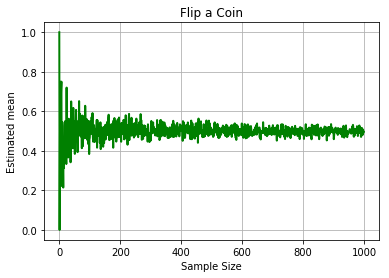

In [47]:
m = 1000
sizes=np.arange(1,m+1)
means=np.zeros((m,))

for i in range(len(sizes)):
    y=np.random.binomial(1,.5,size=sizes[i])
    means[i]=y.mean()

plt.plot(means,'g',lw=2)
plt.grid(True)
plt.title("Flip a Coin")
plt.xlabel("Sample Size")
plt.ylabel("Estimated mean")

In [50]:
#Bruno de Finetti , John Von Neumann, Nick Montropolis,

## Central Limit Theorem

If you take more and more samples, it will more closely resemble the population mean

(array([73., 52., 67., 48., 49., 51., 42., 41., 44., 42., 36., 36., 21.,
        34., 21., 25., 21., 21., 20., 12., 19., 13., 18.,  8., 12.,  8.,
        13., 14.,  8., 12.,  8.,  6.,  7.,  8.,  5.,  7.,  6.,  8.,  2.,
         1.,  4.,  9.,  3.,  4.,  1.,  3.,  1.,  0.,  0.,  1.,  5.,  4.,
         3.,  4.,  2.,  1.,  0.,  1.,  1.,  0.,  4.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.49855911e-03, 6.91915965e-02, 1.36884634e-01, 2.04577671e-01,
        2.72270709e-01, 3.39963746e-01, 4.07656783e-01, 4.75349821e-01,
        5.43042858e-01, 6.10735895e-01, 6.78428933e-01, 7.46121970e-01,
        8.13815008e-01, 8.81508045e-01, 9.49201082e-01, 1.01689412e+00,
        1.08458716e+00, 1.15228019e+00, 1.21997323e+00, 1.28766627e+00,
        1.35535931e+00, 1.42305234e+00, 1.49074538e+00, 1.55843842e+00,
  

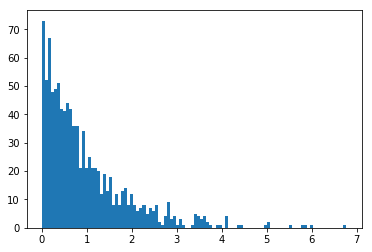

In [59]:
plt.hist(np.random.exponential(size=1000),bins=100)

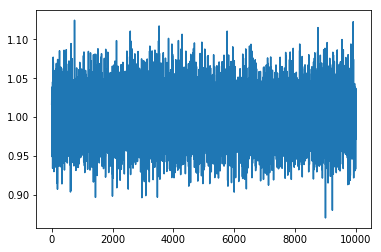

In [63]:
from scipy.stats import gaussian_kde

m=10000
n=1000

means=np.zeros((m,))

for i in range(m):
    x=np.random.exponential(size=n)
    means[i]=x.mean()
#not sure why this doesn't work    
"""density=gaussian_kde(means)
xs=np.linspace(.5,1.5,200)
density.covariance_factor=lambda:.25
density._compute_covariance()
plt.plot(xs.density(xs),lw=2)"""

plt.plot(means)

In [64]:
a=[1,2,3]

In [65]:
a[-1]

3

In [66]:
a[::-1
]

[3, 2, 1]

In [67]:
for x in a[::-1]:
    print(x)

3
2
1
